In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle
import os

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
cifar_train = pd.DataFrame()

for filename in os.listdir("cifar-10-batches-py"):
    if filename[-1].isdigit():
        data = unpickle("cifar-10-batches-py/" + filename)
        data = pd.DataFrame(list(zip(data[b'labels'], data[b'data'])), columns=["label", "data"])
        cifar_train = pd.concat([cifar_train, data], ignore_index=True)
cifar_train.head()

,label,data
0,6,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ..."
1,9,"[154, 126, 105, 102, 125, 155, 172, 180, 142, ..."
2,9,"[255, 253, 253, 253, 253, 253, 253, 253, 253, ..."
3,4,"[28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3..."
4,1,"[170, 168, 177, 183, 181, 177, 181, 184, 189, ..."


In [41]:
label_names = unpickle("cifar-10-batches-py/batches.meta")
label_names = label_names[b'label_names']
label_names = [x.decode('utf-8') for x in label_names]
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
cifar_train['name'] = [label_names[label] for label in cifar_train['label']]
cifar_train.head()

,label,data,name
0,6,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ...",frog
1,9,"[154, 126, 105, 102, 125, 155, 172, 180, 142, ...",truck
2,9,"[255, 253, 253, 253, 253, 253, 253, 253, 253, ...",truck
3,4,"[28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3...",deer
4,1,"[170, 168, 177, 183, 181, 177, 181, 184, 189, ...",automobile


In [30]:
pic = cifar_train.loc[32, 'data']

In [31]:
red = pic[0:1024].reshape(32,32)
grn = pic[1024:2048].reshape(32,32)
blu = pic[2048:3072].reshape(32,32)

img = np.dstack((red, grn, blu))

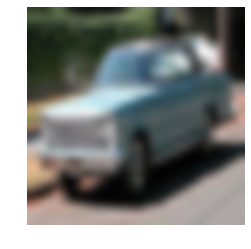

In [32]:
plt.imshow(img, interpolation='bicubic')
plt.axis('off')
plt.show()

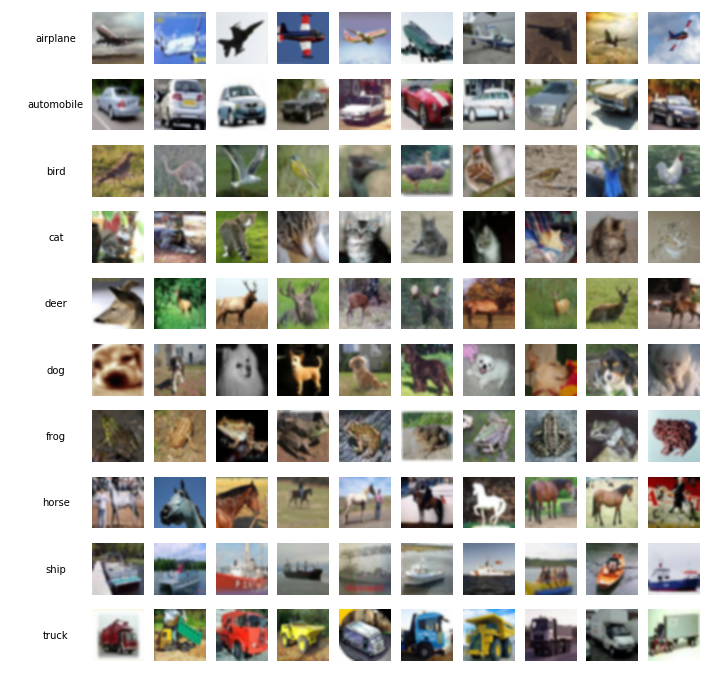

In [39]:
def plot_random(df, labels):
    fig, ax = plt.subplots(figsize = (12,12))
    fig.canvas.draw()
    plt.axis('off')
    gs = GridSpec(10, 11, figure=fig)
    
    for i in range(10):
        match = df[df['label'] == i]['data'].sample(10) # randomly choose 10 rows from df that have label i
        fig.add_subplot(gs[i, 0])
        plt.axis('off')
        plt.text(0.5, 0.5, labels[i], va="center", ha="center") # label each row
        for j in range(10):
            img = match.iloc[j]
            
            red = img[0:1024].reshape(32,32)
            grn = img[1024:2048].reshape(32,32)
            blu = img[2048:3072].reshape(32,32)
            img = np.dstack((red, grn, blu))
            
            fig.add_subplot(gs[i, j+1])
            plt.imshow(img, interpolation='bicubic')
            plt.axis('off')

plot_random(cifar_train, label_names)